<a href="https://colab.research.google.com/github/Tavuencas/BR_Aeronautical_Ocurrences/blob/main/Brazil_Aeronautical_Occurrences_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv ('/content/drive/MyDrive/0. Portifolio - Data Analysis/SQL & Power BI & Python/Brazil aeronautical incidents - dataset/Brazil Total Aeronautical Occurrences 2010 - 2021.csv')

In [ ]:
df.isnull().sum()

ocorrencia_classificacao              0
ocorrencia_latitude                 670
ocorrencia_longitude                670
ocorrencia_cidade                     0
ocorrencia_uf                         0
ocorrencia_pais                       0
ocorrencia_aerodromo                  0
ocorrencia_dia                        0
ocorrencia_hora                       0
investigacao_aeronave_liberada     1648
investigacao_status                   0
divulgacao_relatorio_numero          39
divulgacao_relatorio_publicado        0
divulgacao_dia_publicacao             0
total_recomendacoes                   0
total_aeronaves_envolvidas            0
ocorrencia_saida_pista                0
ocorrencia_tipo                       4
ocorrencia_tipo_categoria             4
taxonomia_tipo_icao                   4
recomendacao_numero                   0
recomendacao_dia_assinatura           0
recomendacao_dia_encaminhamento       0
recomendacao_dia_feedback          1123
recomendacao_conteudo                 0


In [ ]:
df.head(5)

,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,investigacao_aeronave_liberada,...,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total,fator_nome,fator_aspecto,fator_condicionante,fator_area,ano,mes
0,INCIDENTE GRAVE,-9.868333333333,-67.89805555555,RIO BRANCO,AC,BRASIL,SBRB,2022-04-14,17:45:00,SIM,...,APROXIMAÇÃO FINAL,TÁXI AÉREO,NENHUM,0,SUPERVISÃO GERENCIAL,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL,2022,4
1,ACIDENTE,-12.20416666666,-56.23777777777,IPIRANGA DO NORTE,MT,BRASIL,Fora de aerodromo,2022-03-24,19:30:00,SIM,...,MANOBRA,AGRÍCOLA,SUBSTANCIAL,0,ATENÇÃO,ASPECTO PSICOLÓGICO,INDIVIDUAL,FATOR HUMANO,2022,3
2,ACIDENTE,-12.20416666666,-56.23777777777,IPIRANGA DO NORTE,MT,BRASIL,Fora de aerodromo,2022-03-24,19:30:00,SIM,...,MANOBRA,AGRÍCOLA,SUBSTANCIAL,0,ATITUDE,ASPECTO PSICOLÓGICO,INDIVIDUAL,FATOR HUMANO,2022,3
3,ACIDENTE,-12.20416666666,-56.23777777777,IPIRANGA DO NORTE,MT,BRASIL,Fora de aerodromo,2022-03-24,19:30:00,SIM,...,MANOBRA,AGRÍCOLA,SUBSTANCIAL,0,JULGAMENTO DE PILOTAGEM,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL,2022,3
4,ACIDENTE,-12.20416666666,-56.23777777777,IPIRANGA DO NORTE,MT,BRASIL,Fora de aerodromo,2022-03-24,19:30:00,SIM,...,MANOBRA,AGRÍCOLA,SUBSTANCIAL,0,PERCEPÇÃO,ASPECTO PSICOLÓGICO,INDIVIDUAL,FATOR HUMANO,2022,3


In [ ]:
print("Total of lines:", len(df))
print("\nColumns name:", df.columns.tolist())

Total of lines: 7567

Columns name: ['ocorrencia_classificacao', 'ocorrencia_latitude', 'ocorrencia_longitude', 'ocorrencia_cidade', 'ocorrencia_uf', 'ocorrencia_pais', 'ocorrencia_aerodromo', 'ocorrencia_dia', 'ocorrencia_hora', 'investigacao_aeronave_liberada', 'investigacao_status', 'divulgacao_relatorio_numero', 'divulgacao_relatorio_publicado', 'divulgacao_dia_publicacao', 'total_recomendacoes', 'total_aeronaves_envolvidas', 'ocorrencia_saida_pista', 'ocorrencia_tipo', 'ocorrencia_tipo_categoria', 'taxonomia_tipo_icao', 'recomendacao_numero', 'recomendacao_dia_assinatura', 'recomendacao_dia_encaminhamento', 'recomendacao_dia_feedback', 'recomendacao_conteudo', 'recomendacao_status', 'recomendacao_destinatario_sigla', 'recomendacao_destinatario', 'aeronave_matricula', 'aeronave_tipo_veiculo', 'aeronave_fabricante', 'aeronave_modelo', 'aeronave_tipo_icao', 'aeronave_motor_tipo', 'aeronave_motor_quantidade', 'aeronave_pmd', 'aeronave_pmd_categoria', 'aeronave_assentos', 'aeronave_ano

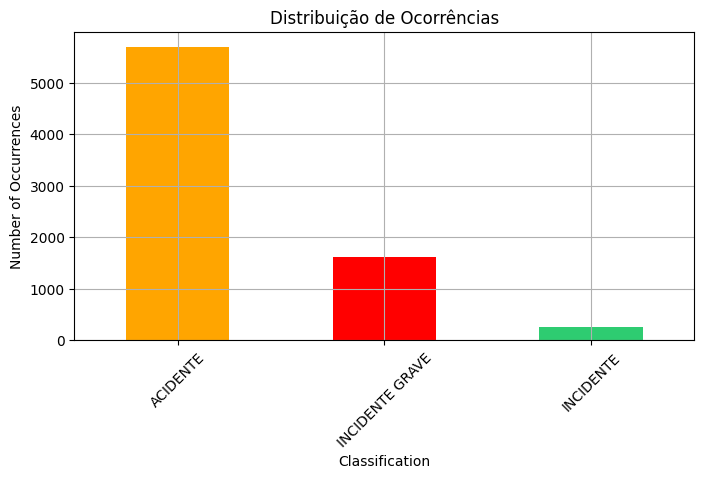

In [ ]:
#Distribution of occurrences by classification

colors = ['orange', 'red', '#2ecc71']

plt.figure(figsize=(8,4))
df['ocorrencia_classificacao'].value_counts().plot(kind='bar', color=colors)
plt.title('Distribuição de Ocorrências')
plt.xlabel('Classification')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45)
plt.grid()
plt.show()

PT - O número de ocorrências de "ACIDENTE" é o maior entre as categorias, sendomais que o dobro de "INCIDENTE GRAVE"

EN - The number of occurrences of "ACCIDENT" is the highest among the categories, being more than double that of "SERIOUS INCIDENT"

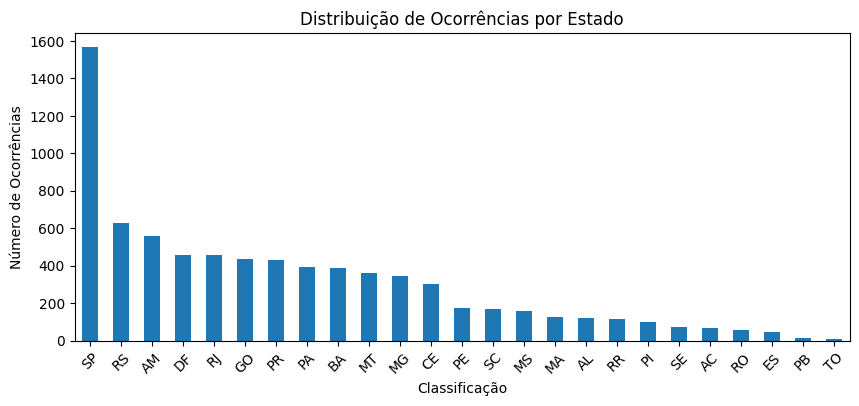

In [ ]:
contagem_uf = df['ocorrencia_uf'].value_counts()

plt.figure(figsize=(10,4))
contagem_uf.plot(kind='bar')
plt.title('Distribuição de Ocorrências por Estado')
plt.xlabel('Classificação')
plt.ylabel('Número de Ocorrências')
plt.xticks(rotation=45)
plt.show()

PT - SP é o estado com maior número de ocorrências e TO o estado com menor número de ocorrências.
*Pode ser por conta do alto volume de voos em SP

EN - SP is the state with the highest number of occurrences and TO is the state with the lowest number of occurrences
*It may be due to the high volume of flights in SP

In [ ]:
df['ocorrencia_dia'] = pd.to_datetime(df['ocorrencia_dia'], dayfirst=True)
df['ano'] = df['ocorrencia_dia'].dt.year
df['mes'] = df['ocorrencia_dia'].dt.month

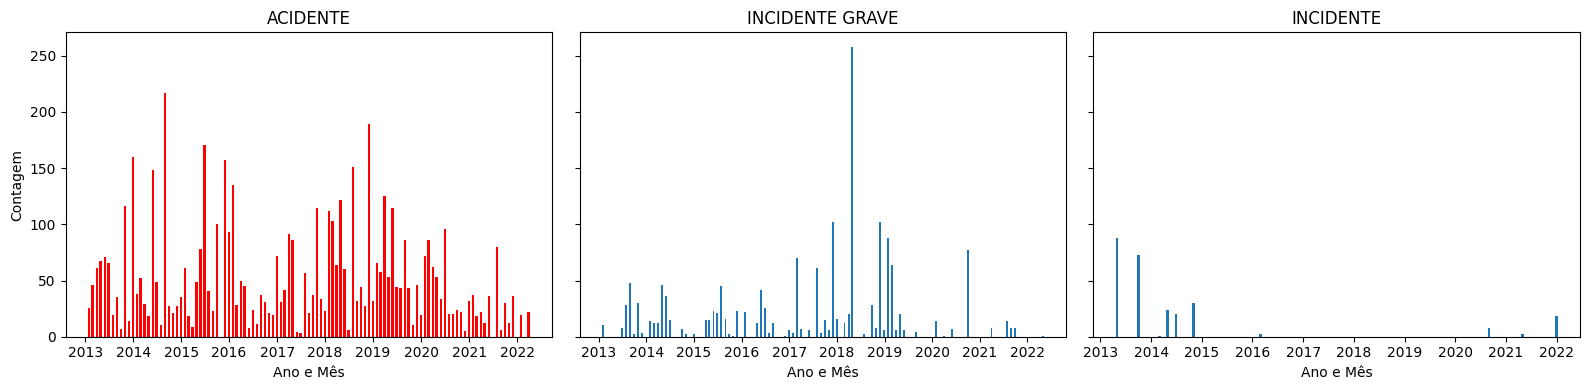

In [ ]:
# Filter por categoria
incidente_grave = df[df['ocorrencia_classificacao'] == 'INCIDENTE GRAVE']
acidente = df[df['ocorrencia_classificacao'] == 'ACIDENTE']
incidente = df[df['ocorrencia_classificacao'] == 'INCIDENTE']

acidente_resampled = acidente.resample('M', on='ocorrencia_dia').size()
incidente_grave_resampled = incidente_grave.resample('M', on='ocorrencia_dia').size()
incidente_resampled = incidente.resample('M', on='ocorrencia_dia').size()

# Subplots
fig, axs = plt.subplots(1, 3, figsize=(16, 4), sharey=True)

axs[0].bar(acidente_resampled.index, acidente_resampled, width=20, label='ACIDENTE', color='red')
axs[0].set_title('ACIDENTE')
axs[0].set_xlabel('Ano e Mês')
axs[0].set_ylabel('Contagem')

axs[1].bar(incidente_grave_resampled.index, incidente_grave_resampled, width=15, label='INCIDENTE GRAVE')
axs[1].set_title('INCIDENTE GRAVE')
axs[1].set_xlabel('Ano e Mês')

axs[2].bar(incidente_resampled.index, incidente_resampled, width=20, label='INCIDENTE')
axs[2].set_title('INCIDENTE')
axs[2].set_xlabel('Ano e Mês')

plt.tight_layout()
plt.show()


PT - A categoria "ACIDENTE" teve seu pico de acorrências em 2014, enquanto a  categoria "INCIDENTE GRAVE" teve seu pico de ocorrências em 2018.

EN - The "ACCIDENT" category peaked in 2014, while the "SERIOUS INCIDENT" category peaked in 2018.

In [ ]:
#Grouping data and counting number of occurrences
ocorrencias_agrupadas = df.groupby(['ano', 'mes']).size().reset_index(name='num_ocorrencias')

# Identifying the month with the highest number of occurrences for each year
meses_maior_ocorrencia = ocorrencias_agrupadas.loc[ocorrencias_agrupadas.groupby('ano')['num_ocorrencias'].idxmax()]

# Converting the month number to the month name
meses_maior_ocorrencia['mes'] = meses_maior_ocorrencia['mes'].apply(lambda x: pd.Timestamp(2013, x, 1).strftime('%B'))

for _, row in meses_maior_ocorrencia.iterrows():
    print(f"{row['ano']} - {row['mes']} ({row['num_ocorrencias']} ocorrências)")

2013 - December (160 ocorrências)
2014 - August (217 ocorrências)
2015 - June (192 ocorrências)
2016 - January (157 ocorrências)
2017 - November (136 ocorrências)
2018 - April (380 ocorrências)
2019 - January (154 ocorrências)
2020 - September (101 ocorrências)
2021 - July (94 ocorrências)
2022 - March (22 ocorrências)


PT - Tabela com mês de mais ocorrências de cada ano.

EN - Table with the month with the most occurrences each year.

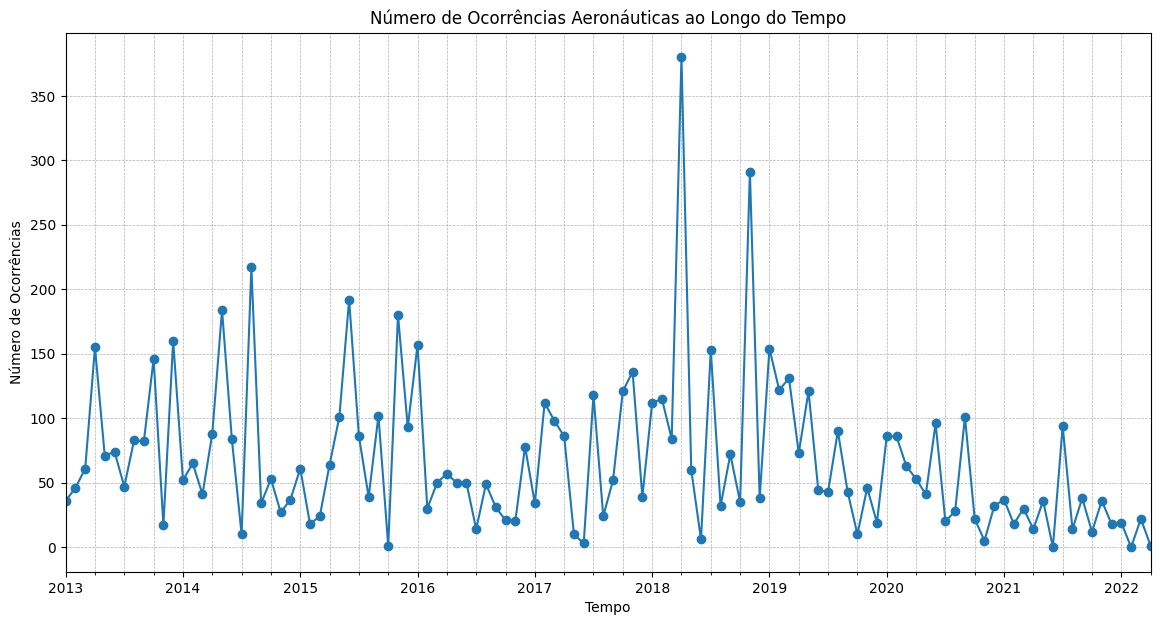

In [ ]:
df['ocorrencia_dia'] = pd.to_datetime(df['ocorrencia_dia'], dayfirst=True)
df_resampled = df.resample('M', on='ocorrencia_dia').size()

fig, ax = plt.subplots(figsize=(14, 7))
df_resampled.plot(ax=ax, marker='o', linestyle='-')
ax.set_title('Número de Ocorrências Aeronáuticas ao Longo do Tempo')
ax.set_xlabel('Tempo')
ax.set_ylabel('Número de Ocorrências')
ax.grid(True, which='both', axis='both', linestyle='--', linewidth=0.5)

plt.show()

PT - Variações sazonais: é possível detectar padrões recorrentes em certas épocas do ano. Esses padrões podem ser indicativos de fatores sazonais, como condições climáticas adversas ou maior tráfego aéreo em feriados.

PT - Eventos específicos: picos ou quedas bruscas no gráfico podem estar relacionados a eventos específicos ou mudanças nas políticas e regulamentações - exemplo de 2018.

-

EN - Seasonal variations: it is possible to detect recurring patterns at certain times of the year. These patterns can be indicative of seasonal factors, such as adverse weather conditions or increased air traffic on public holidays.

EN - Specific events: sharp peaks or drops in the graph can be related to specific events or changes in policies and regulations - an example from 2018.

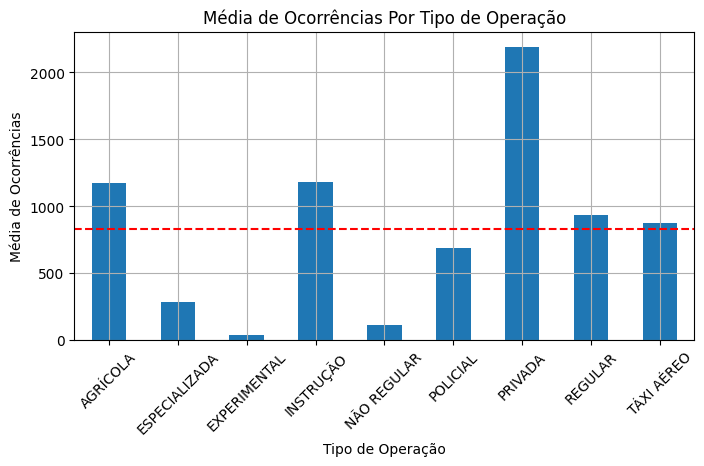

In [ ]:
media_por_operacao = df.groupby('aeronave_tipo_operacao')['ocorrencia_tipo'].count().reset_index()
media_por_operacao.columns = ['aeronave_tipo_operacao', 'media_ocorrencias']

plt.figure(figsize=(8, 4))
plt.axhline(y=media_por_operacao['media_ocorrencias'].mean(), color='r', linestyle='--')
media_por_operacao.set_index('aeronave_tipo_operacao')['media_ocorrencias'].plot(kind='bar')
plt.title('Média de Ocorrências Por Tipo de Operação')
plt.xlabel('Tipo de Operação')
plt.ylabel('Média de Ocorrências')
plt.xticks(rotation=45)
plt.grid()
plt.show()

PT - É possíver visualizar que os tipos de operações, em ordem decrescente, "PRIVADA", "INSTRUÇÃO", "AGRÍCOLA", "REGULAR" e "TÁXI AÉREO" estão acima da média de acorrências. Especialmente a "PRIVADA".

EN - It can be seen that the types of operations, in descending order, "PRIVATE", "INSTRUCTION", "AGRICULTURAL", "REGULAR" and "AIR TAXI" are above the average number of occurrences. Especially "PRIVATE".

In [ ]:
contagem_fator = df['fator_aspecto'].value_counts()

print(contagem_fator)

DESEMPENHO DO SER HUMANO                          3698
ASPECTO PSICOLÓGICO                               3067
INFRAESTRUTURA AEROPORTUÁRIA                       196
ASPECTO MÉDICO                                     182
ELEMENTOS RELACIONADOS AO AMBIENTE OPERACIONAL     162
OUTRO                                              119
INFRAESTRUTURA DE TRÁFEGO AÉREO                     40
ASPECTO DE PROJETO                                  32
ERGONOMIA                                           31
ASPECTO DE FABRICAÇÃO                               28
ASPECTO DE MANUSEIO DO MATERIAL                     12
Name: fator_aspecto, dtype: int64


PT - Os dois maiores fatores para as ocorrências são "DESEMPENHO DO SER HUMANO" e "ASPECTO PSICOLÓGICO"

EN - The two biggest factors for occurrences are "HUMAN PERFORMANCE" and "PSYCHOLOGICAL ASPECT"